# 1 ) Data pre-processing

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Importing and cleaning the data

In [15]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings = ratings.drop(columns='timestamp')
import pandas as pd
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None)
# Set proper column names for movies
movies.columns = ['movie_id', 'movie_name', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
movies = movies[['movie_id', 'movie_name']]
movie_rating_df = ratings.merge(movies, on="movie_id")
movie_rating_df

,user_id,movie_id,rating,movie_name
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)
...,...,...,...,...
99995,880,476,3,"First Wives Club, The (1996)"
99996,716,204,5,Back to the Future (1985)
99997,276,1090,1,Sliver (1993)
99998,13,225,2,101 Dalmatians (1996)


In [7]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   movie_id    100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   movie_name  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [9]:
movie_rating_df.describe()

,user_id,movie_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [85]:
ratings = pd.read_csv('Electronics.csv',names=['user_id', 'product_id', 'rating', 'timestamp'])
ratings = ratings.drop(columns='timestamp')
ratings = ratings.head(100000)
#df_colab = ratings[(ratings['user_id'] >= 1) & (ratings['user_id'] <= 350) &
 #                (ratings['movie_id'] >= 1) & (ratings['movie_id'] <= 979)]

In [87]:
ratings.head(10)

,user_id,product_id,rating
0,0060009810,A1N070NS9CJQ2I,5.0
1,0060009810,A3P0KRKOBQK1KN,5.0
2,0060009810,A192HO2ICJ75VU,5.0
3,0060009810,A2T278FKFL3BLT,4.0
4,0060009810,A2ZUXVTW8RXBXW,5.0
5,0060009810,A21JDG4HA6OLPF,4.0
6,0060009810,A2NCADLQY962YD,5.0
7,0060786817,A2UNA438B0FRA8,5.0
8,0060786817,A2NQQSHSQKKGEX,5.0
9,0060786817,A5EXND10WD4PM,3.0


In [9]:
df_colab = df_colab.drop(columns = "movie_name")

In [91]:
# Sorted encoding for user_id
unique_users = pd.Series(ratings['user_id'].unique()).sort_values().reset_index(drop=True)
user_mapping = {user: i+1 for i, user in enumerate(unique_users)}
ratings['user_id'] = ratings['user_id'].map(user_mapping)

# Sorted encoding for product_id
unique_products = pd.Series(ratings['product_id'].unique()).sort_values().reset_index(drop=True)
product_mapping = {prod: i+1 for i, prod in enumerate(unique_products)}
ratings['product_id'] = ratings['product_id'].map(product_mapping)


In [93]:
ratings.describe()

,user_id,product_id,rating
count,100000.000000,100000.00000,100000.000000
mean,679.131720,47615.23878,4.172710
std,370.809405,27477.73046,1.297959
min,1.000000,1.00000,1.000000
25%,362.000000,23813.75000,4.000000
50%,669.000000,47612.50000,5.000000
75%,986.000000,71403.25000,5.000000
max,1290.000000,95191.00000,5.000000


In [95]:
df_colab = ratings[(ratings['user_id'] >= 1) & (ratings['user_id'] <= 350) &
                 (ratings['product_id'] >= 1) & (ratings['product_id'] <= 979)]
df_colab

,user_id,product_id,rating
96,5,155,4.0
165,10,452,2.0
442,19,515,5.0
466,19,469,5.0
467,19,351,5.0
...,...,...,...
26959,337,735,1.0
27624,346,99,5.0
27646,346,315,5.0
27649,346,393,5.0


In [97]:
df_colab.describe()

,user_id,product_id,rating
count,245.000000,245.000000,245.000000
mean,177.910204,469.448980,4.212245
std,100.405531,287.994725,1.325913
min,5.000000,1.000000,1.000000
25%,88.000000,217.000000,4.000000
50%,174.000000,469.000000,5.000000
75%,287.000000,712.000000,5.000000
max,347.000000,978.000000,5.000000


In [23]:
ratings_per_user = df_colab.groupby('movie_id')['user_id'].nunique().reset_index()

# Rename columns for clarity
ratings_per_user.columns = ['movie_id', 'products_rated']

# Display result
print(ratings_per_user)

     movie_id  products_rated
0           1             170
1           2              44
2           3              36
3           4              79
4           5              35
..        ...             ...
974       975              18
975       976               7
976       977              20
977       978              11
978       979              11

[979 rows x 2 columns]


In [25]:
ratings_per_user.describe()

,movie_id,products_rated
count,979.000000,979.000000
mean,490.000000,36.394280
std,282.757257,34.546578
min,1.000000,1.000000
25%,245.500000,11.000000
50%,490.000000,25.000000
75%,734.500000,50.000000
max,979.000000,213.000000


In [41]:
filtered = ratings_per_user[ratings_per_user['products_rated'] >= 8]
print(filtered.shape[0])

814


In [160]:
df_colab.to_csv("ratings.csv", index=False)

In [23]:
df_colab_pivot = df_colab.pivot_table(columns="movie_name", index="user_id", values="rating").fillna(0)
df_colab_pivot

movie_name,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),"Young Poisoner's Handbook, The (1995)",unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
348,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [597]:
movie_rating_pivot = movie_rating_df.pivot_table(columns="movie_name", index="user_id", values="rating").fillna(0)
movie_rating_pivot

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2 ) Modeling 

## searching for the optimal k number of clusters 

### -Using the elbow method

C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

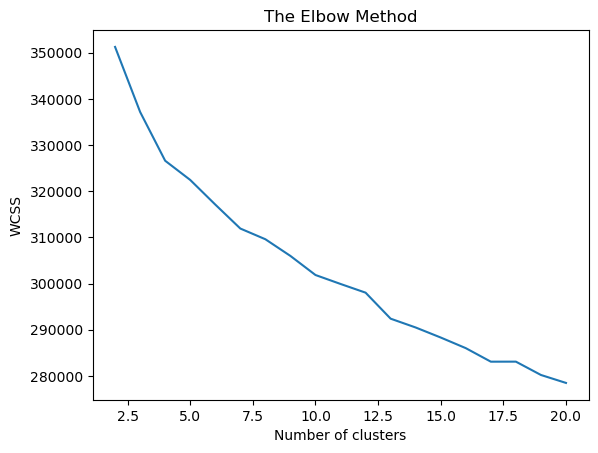

In [93]:
wcss = []
for i in range(2,21):
    kmeans = KMeans(n_clusters = i ,n_init = 5, init='k-means++' , random_state=1)
    kmeans.fit(df_colab_pivot)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

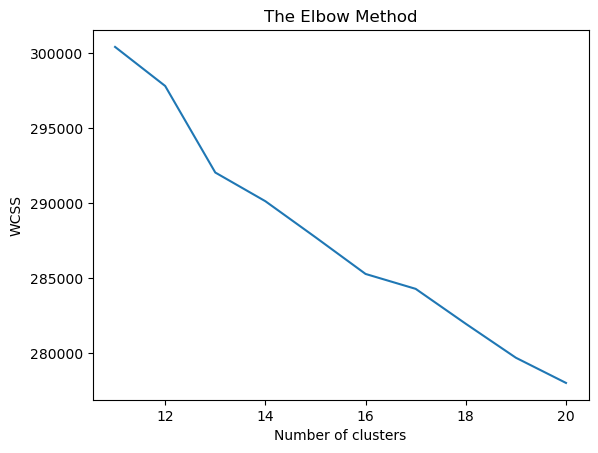

In [29]:
wcss = []
for i in range(11,21):
    kmeans = KMeans(n_clusters = i ,n_init = 5, init='k-means++' , random_state=1)
    kmeans.fit(df_colab_pivot)
    wcss.append(kmeans.inertia_)
plt.plot(range(11,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### -Using the silhouette score method

In [31]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init = 5, init='k-means++', random_state=1)
    preds = kmeans.fit_predict(df_colab_pivot)
    score = silhouette_score(df_colab_pivot, preds)
    print(f"Silhouette score for k={k}: {score}")

C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=2: 0.2356802832169592
Silhouette score for k=3: 0.21439320402771034
Silhouette score for k=4: 0.1368830382406026


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=5: 0.11335728889799997
Silhouette score for k=6: -0.017953081674433876
Silhouette score for k=7: 0.023488127258659057


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=8: 0.06441062995948266
Silhouette score for k=9: 0.03465797446226221
Silhouette score for k=10: -0.024612903413274684


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [33]:
for k in range(11, 21):
    kmeans = KMeans(n_clusters=k,n_init = 5, init='k-means++', random_state=1)
    preds = kmeans.fit_predict(df_colab_pivot)
    score = silhouette_score(df_colab_pivot, preds)
    print(f"Silhouette score for k={k}: {score}")

C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=11: -0.004232515161100474
Silhouette score for k=12: 0.034263746655405755


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=13: 0.055634527074980934
Silhouette score for k=14: 0.055501973549565806


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=15: 0.02772370331369662
Silhouette score for k=16: 0.027939787717989002


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=17: 0.017234918625747414
Silhouette score for k=18: -0.03461153302703476


C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette score for k=19: 0.002964646211311022
Silhouette score for k=20: -0.009710326184287858


## Training the K-means model on the dataset

In [99]:
kmeans = KMeans(n_clusters =  5,n_init = 5, init='k-means++' , random_state = 0)
y_kmeans = kmeans.fit_predict(df_colab_pivot)
df_colab_pivot['cluster'] = y_kmeans
cluster_counts = df_colab_pivot['cluster'].value_counts().sort_index()
print(cluster_counts)

NameError: name 'df_colab_pivot' is not defined

In [133]:
kmeans2 = KMeans(n_clusters =  6,n_init = 5, init='k-means++' , random_state = 1)
y_kmeans2 = kmeans2.fit_predict(df_colab_pivot)
df_colab_pivot['cluster'] = y_kmeans2
cluster_counts = df_colab_pivot['cluster'].value_counts().sort_index()
print(cluster_counts)

C:\Users\badro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


cluster
0     54
1    148
2     23
3     84
4     20
5     21
Name: count, dtype: int64


## Recommander system algorithme

In [99]:
cluster_users = df_colab_pivot[df_colab_pivot['cluster'] == 3]
cluster_users

movie_name,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),"Young Poisoner's Handbook, The (1995)",unknown,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
6,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,3
7,0.0,4.0,0.0,5.0,5.0,0.0,4.0,0.0,5.0,0.0,...,0.0,0.0,0.0,3.0,0.0,5.0,3.0,3.0,0.0,3
10,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
13,2.0,4.0,0.0,2.0,5.0,1.0,4.0,0.0,3.0,1.0,...,0.0,4.0,0.0,5.0,2.0,5.0,3.0,1.0,0.0,3
18,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,3
59,0.0,0.0,0.0,4.0,5.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,0.0,5.0,3.0,3.0,0.0,3
60,3.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3
85,0.0,0.0,0.0,3.0,5.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,3
90,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3


In [1858]:
rated_by_user = cluster_users.loc[201]
already_rated = rated_by_user[rated_by_user > 3].index
already_rated

Index(['Addiction, The (1995)', 'Alien (1979)', 'Aliens (1986)',
       'Amadeus (1984)', 'Anna (1996)', 'Back to the Future (1985)',
       'Basketball Diaries, The (1995)', 'Beautiful Thing (1996)',
       'Beauty and the Beast (1991)', 'Before the Rain (Pred dozhdot) (1994)',
       ...
       'Under Siege (1992)', 'Unforgiven (1992)', 'Usual Suspects, The (1995)',
       'Vertigo (1958)', 'Welcome to the Dollhouse (1995)',
       'What Happened Was... (1994)', 'What's Eating Gilbert Grape (1993)',
       'When Harry Met Sally... (1989)', 'Wild Bill (1995)', 'cluster'],
      dtype='object', name='movie_name', length=139)

In [105]:
def recommend_movies(user_id):
    if user_id not in df_colab_pivot.index:
        return f"User {user_id} not found."

    # Get the cluster of the given user
    cluster_n = df_colab_pivot.loc[user_id, 'cluster']

    # Get all users in the same cluster
    cluster_users = df_colab_pivot[df_colab_pivot['cluster'] == cluster_n]

    # Remove the cluster column
    cluster_users = cluster_users.drop(columns='cluster')

    # Get movies the user has already rated
    rated_by_user = cluster_users.loc[user_id]
    already_rated = rated_by_user[rated_by_user > 0].index

    # Calculate average ratings per movie in the cluster
    movie_means = cluster_users.mean().sort_values(ascending=False)

    # Remove already rated movies
    recommendations = movie_means.drop(already_rated).head(5)

    return recommendations


In [107]:
recommend_movies(6)

movie_name
Chinatown (1974)              3.826087
Rear Window (1954)            3.565217
Clockwork Orange, A (1971)    3.347826
Return of the Jedi (1983)     3.304348
Jaws (1975)                   3.304348
dtype: float64

In [1956]:
movie_rating_df[(movie_rating_df['movie_name'] == "Vertigo (1958)") & (movie_rating_df['user_id'] == 151)]


,user_id,movie_id,rating,movie_name


In [117]:
# Get the cluster of the given user
cluster_n = df_colab_pivot.loc[6, 'cluster']

# Get all users in the same cluster
cluster_users = df_colab_pivot[df_colab_pivot['cluster'] == cluster_n].index

# Find who among them rated "Vertigo (1958)" and sort by user_id ascending
users_rated_movie = (
    df_colab[
        (df_colab['user_id'].isin(cluster_users)) &
        (df_colab['movie_name'] == "Vertigo (1958)")
    ]
    .sort_values(by='user_id', ascending=True)
)

users_rated_movie



,user_id,movie_id,rating,movie_name
7379,6,479,5,Vertigo (1958)
139,7,479,4,Vertigo (1958)
89789,10,479,5,Vertigo (1958)
15750,18,479,4,Vertigo (1958)
41232,59,479,5,Vertigo (1958)
53781,60,479,5,Vertigo (1958)
17729,85,479,4,Vertigo (1958)
78939,90,479,5,Vertigo (1958)
17695,194,479,3,Vertigo (1958)
57481,234,479,5,Vertigo (1958)


In [1866]:
user_id = 201
print("Movies already rated highly by user:")
user_ = movie_rating_df[(movie_rating_df["user_id"] == user_id) & (movie_rating_df["rating"] >= 4)]
user_

Movies already rated highly by user:


,user_id,movie_id,rating,movie_name
62,201,219,4,"Nightmare on Elm Street, A (1984)"
308,201,767,4,"Addiction, The (1995)"
734,201,1100,4,What Happened Was... (1994)
902,201,203,5,Unforgiven (1992)
985,201,518,4,Miller's Crossing (1990)
...,...,...,...,...
86420,201,1208,4,Kiss of Death (1995)
90154,201,508,4,"People vs. Larry Flynt, The (1996)"
90753,201,33,4,Desperado (1995)
97039,201,1137,4,Beautiful Thing (1996)


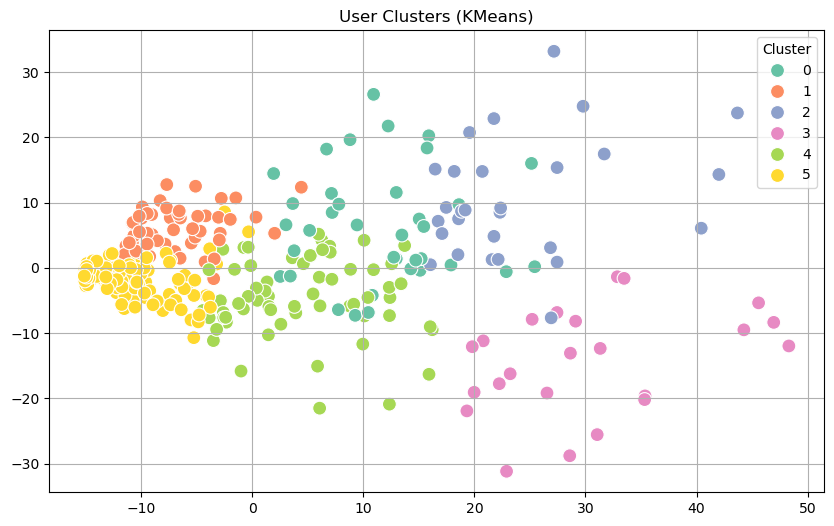

In [152]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_colab_pivot)

plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
plot_df['cluster'] = y_kmeans

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=100)
plt.title('User Clusters (KMeans)')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 3 ) Evaluating

In [121]:
def compare_users_in_cluster(user1, user2, pivot_df):
    # Drop the cluster column to get pure rating data
    ratings_df = pivot_df.drop(columns='cluster')

    # Get ratings for both users
    user1_ratings = ratings_df.loc[user1]
    user2_ratings = ratings_df.loc[user2]

    # Find movies both users have rated (non-zero)
    common_movies = (user1_ratings > 0) & (user2_ratings > 0)

    # Filter ratings to only those common movies
    comparison_df = pd.DataFrame({
        'Movie': user1_ratings[common_movies].index,
        f'User {user1} Rating': user1_ratings[common_movies].values,
        f'User {user2} Rating': user2_ratings[common_movies].values
    })

    # Optional: Add similarity metric per movie (e.g., absolute difference)
    comparison_df['Abs Difference'] = abs(comparison_df[f'User {user1} Rating'] - comparison_df[f'User {user2} Rating'])

    # Calculate similarity score
    max_diff = 4  # assuming ratings are from 1 to 5
    avg_abs_diff = comparison_df['Abs Difference'].mean()
    similarity_score = 1 - (avg_abs_diff / max_diff)
    
    return comparison_df.sort_values(by='Abs Difference'), round(similarity_score, 3)


In [123]:
compare_users_in_cluster(7, 6, df_colab_pivot)

(                                Movie  User 7 Rating  User 6 Rating  \
 0                 12 Angry Men (1957)            4.0            4.0   
 107      Sense and Sensibility (1995)            4.0            4.0   
 105  Secret of Roan Inish, The (1994)            4.0            4.0   
 97             Raising Arizona (1987)            5.0            5.0   
 95                 Raging Bull (1980)            4.0            4.0   
 ..                                ...            ...            ...   
 30                    Clueless (1995)            5.0            2.0   
 125             Twelve Monkeys (1995)            5.0            2.0   
 9                    Apollo 13 (1995)            5.0            2.0   
 6                   Annie Hall (1977)            2.0            5.0   
 68            Jungle Book, The (1994)            4.0            1.0   
 
      Abs Difference  
 0               0.0  
 107             0.0  
 105             0.0  
 97              0.0  
 95              0.

In [127]:
from sklearn.metrics import silhouette_samples
import numpy as np

# y_kmeans = your cluster labels, X = movie_rating_pivot
sample_silhouettes = silhouette_samples(df_colab_pivot, y_kmeans)

for k in np.unique(y_kmeans):
    mask = (y_kmeans == k)
    print(f"Cluster {k} average silhouette: {sample_silhouettes[mask].mean():.3f}")


Cluster 0 average silhouette: -0.097
Cluster 1 average silhouette: -0.055
Cluster 2 average silhouette: -0.042
Cluster 3 average silhouette: -0.009
Cluster 4 average silhouette: -0.101
Cluster 5 average silhouette: 0.209


In [129]:
from itertools import combinations

def average_similarity_in_cluster(cluster_label, pivot_df):
    # Extract only the users in this cluster
    users_in_cluster = pivot_df[pivot_df['cluster'] == cluster_label].index.tolist()
    
    # Prepare to accumulate similarity scores
    similarity_scores = []
    
    # Pre-drop the cluster column once
    ratings_df = pivot_df.drop(columns='cluster')
    
    # Loop over all unique user-user pairs
    for user1, user2 in combinations(users_in_cluster, 2):
        # Get their ratings
        user1_ratings = ratings_df.loc[user1]
        user2_ratings = ratings_df.loc[user2]
        
        # Find common rated movies
        common_movies = (user1_ratings > 0) & (user2_ratings > 0)
        if not common_movies.any():
            # No common ratings, skip
            continue
        
        # Compare ratings for common movies
        comparison_df = pd.DataFrame({
            'Movie': user1_ratings[common_movies].index,
            f'User {user1} Rating': user1_ratings[common_movies].values,
            f'User {user2} Rating': user2_ratings[common_movies].values
        })
        comparison_df['Abs Difference'] = abs(comparison_df[f'User {user1} Rating'] - comparison_df[f'User {user2} Rating'])
        
        # Compute similarity score
        max_diff = 4  # assuming ratings are from 1 to 5
        avg_abs_diff = comparison_df['Abs Difference'].mean()
        similarity_score = 1 - (avg_abs_diff / max_diff)
        
        # Add the score to the list
        similarity_scores.append(similarity_score)
    
    # If there are no valid pairs (all pairs had no common movies), return 0
    if not similarity_scores:
        return 0
    
    # Calculate the average similarity score
    avg_similarity = round(sum(similarity_scores) / len(similarity_scores), 3)
    return avg_similarity



In [131]:
cluster_labels = df_colab_pivot['cluster'].unique()

for label in cluster_labels:
    avg_sim = average_similarity_in_cluster(label, df_colab_pivot)
    print(f"Average Similarity for Cluster {label}: {avg_sim}")



Average Similarity for Cluster 2: 0.76
Average Similarity for Cluster 5: 0.718
Average Similarity for Cluster 4: 0.752
Average Similarity for Cluster 3: 0.776
Average Similarity for Cluster 1: 0.72
Average Similarity for Cluster 0: 0.745


In [1542]:
cluster_labels = movie_rating_pivot['cluster'].unique()

for label in cluster_labels:
    avg_sim = average_similarity_in_cluster(label, movie_rating_pivot)
    print(f"Average Similarity for Cluster {label}: {avg_sim}")

Average Similarity for Cluster 0: 0.753
Average Similarity for Cluster 2: 0.716
Average Similarity for Cluster 1: 0.743
Average Similarity for Cluster 3: 0.762


In [1738]:
cluster_labels = movie_rating_pivot['cluster'].unique()

for label in cluster_labels:
    avg_sim = average_similarity_in_cluster(label, movie_rating_pivot)
    print(f"Average Similarity for Cluster {label}: {avg_sim}")

Average Similarity for Cluster 4: 0.745
Average Similarity for Cluster 2: 0.737
Average Similarity for Cluster 3: 0.71
Average Similarity for Cluster 1: 0.745
Average Similarity for Cluster 5: 0.766
Average Similarity for Cluster 0: 0.751
